In [9]:
from NormalNormalModel import Environment, Estimator
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,10
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))






In [10]:
# Create Environment
BAND_MEAN = 5
BAND_SIGMA = 2
NUM_BINS = 10000
BIN_SIGMA = 1


In [11]:
env = Environment(BAND_MEAN, BAND_SIGMA,NUM_BINS, BIN_SIGMA)

Number of Bins: 10000
Sample Distribution of Expected Bin Rewards : N(5.02,4.12)


(<Figure size 1440x720 with 1 Axes>,
 <AxesSubplot:title={'center':'Sample Distribution of Bin Means'}, xlabel="Bin $\\mu$'s">,
 array([-1.25333819, -0.99742457, -0.74151095, -0.48559734, -0.22968372,
         0.0262299 ,  0.28214352,  0.53805714,  0.79397075,  1.04988437,
         1.30579799,  1.56171161,  1.81762523,  2.07353884,  2.32945246,
         2.58536608,  2.8412797 ,  3.09719331,  3.35310693,  3.60902055,
         3.86493417,  4.12084779,  4.3767614 ,  4.63267502,  4.88858864,
         5.14450226,  5.40041588,  5.65632949,  5.91224311,  6.16815673,
         6.42407035,  6.67998397,  6.93589758,  7.1918112 ,  7.44772482,
         7.70363844,  7.95955205,  8.21546567,  8.47137929,  8.72729291,
         8.98320653,  9.23912014,  9.49503376,  9.75094738, 10.006861  ,
        10.26277462, 10.51868823, 10.77460185, 11.03051547, 11.28642909]))

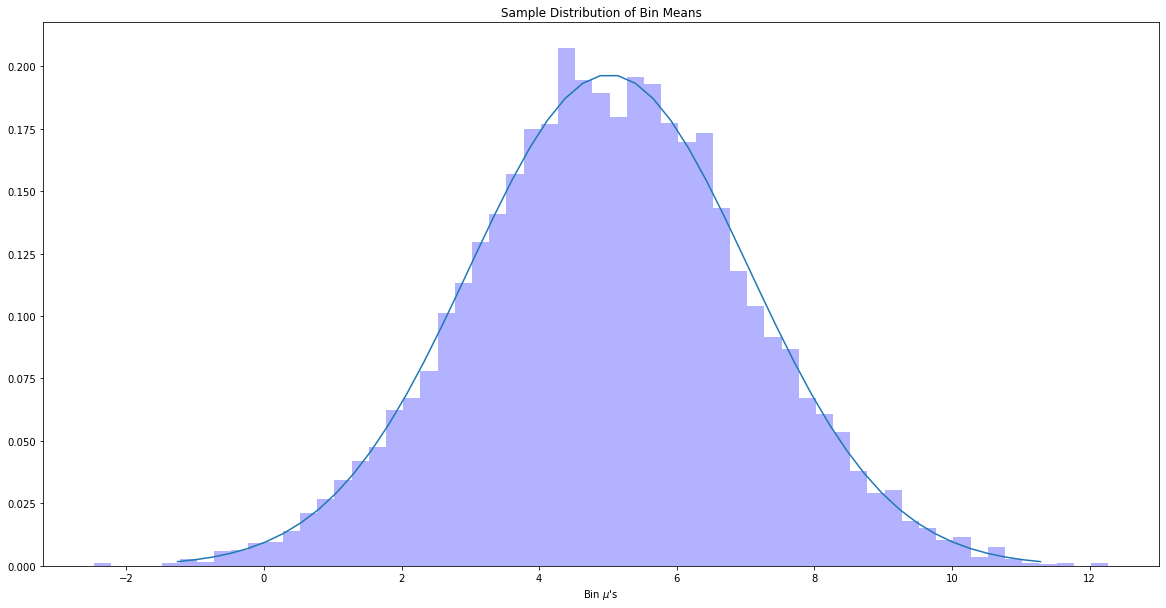

In [4]:
print(f"Number of Bins: {NUM_BINS}")
env.plot_band_distribution()

# Demonstrating Bin Reward Distributions


Sample Distribution of Expected Bin Rewards : N(4.97,4.03)
Plotting distribution of bin # 1762


(<Figure size 1440x720 with 2 Axes>,
 array([<AxesSubplot:title={'center':'Sample Distribution of Bin Means'}, xlabel="Bin $\\mu$'s">,
        <AxesSubplot:>], dtype=object))

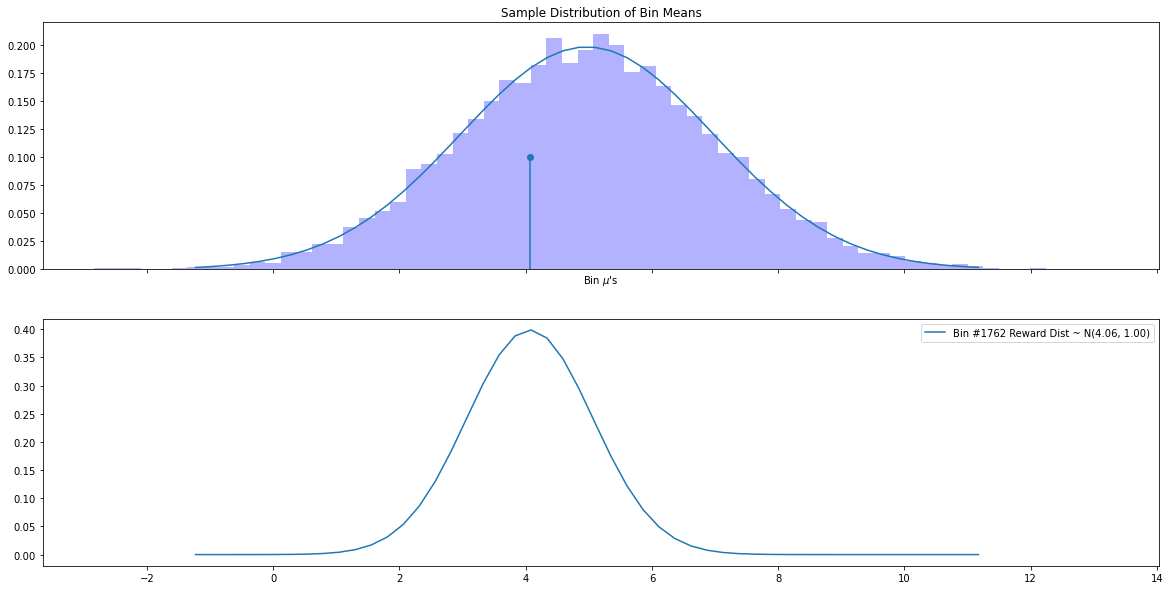

In [12]:
env.plot_bin_band_dist()

In [13]:
# Creating Estimator object
prior_mu_p = 4  # prior mean parameter on mu_b
prior_sigma_p = 2 # prior sigma parameter on mu_b
prior_sigma_b = 1 # prior sigma parameter on mu_j
CRED_INT = 0.95

est = Estimator(env, NUM_BINS, prior_mu_p, prior_sigma_p, prior_sigma_b, BIN_SIGMA)

Estimator object created


# Plotting the prior distribution on $\mu_b$


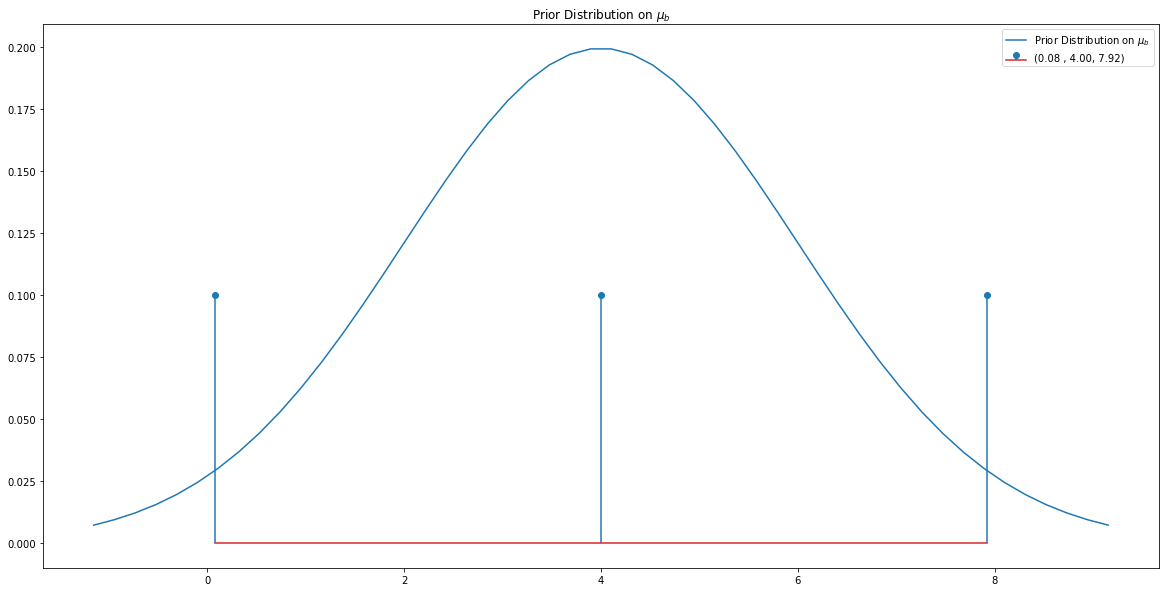

In [14]:
fig, ax = plt.subplots()
ax.cred_int = CRED_INT
est.posterior.plot_posterior(q = 0.005,fig =fig, ax=ax)

Sample Distribution of Expected Bin Rewards : N(4.97,4.03)
Drawing 10 samples from bin # 0
Observations: [7.60925646 4.9608923  5.62123388 4.28003903 4.51555643 5.30835722
 5.62420818 5.66428623 5.0385086  6.13143088]
Computing posteriors based on observations
True bin distribution: Bin #0 ~ N(5.894, 1)
Observation: [7.60925646 4.9608923  5.62123388 4.28003903 4.51555643 5.30835722
 5.62420818 5.66428623 5.0385086  6.13143088]
Observation mean: 5.475
Observation variance: 0.790
Posterior before update: N(4.000, 4.000)
Bin Posterior before update: P(mu_j|mu_b_mmse = 4) = N([4], 1)
Posterior after the update: N(5.157, 0.863)
Bin Posterior after update: P(mu_j|mu_b_mmse = 5.157158370285962) = N(5.4464479628574525, 0.09090909090909091)


(<Figure size 1440x720 with 8 Axes>,
 {'true_band_dist': <AxesSubplot:label='true_band_dist', title={'center':'Sample Distribution of Bin Means'}, xlabel="Bin $\\mu$'s">,
  'true_rew_dist': <AxesSubplot:label='true_rew_dist', title={'center':'Bin #0 Reward Dist ~ N(5.89, 1.00) + 10 samples'}>,
  'prior_mu_b': <AxesSubplot:label='prior_mu_b', title={'center':'Prior Distribution on $\\mu_b$'}>,
  'prior_mu_j': <AxesSubplot:label='prior_mu_j', title={'center':'Prior Distribution on $\\mu_j | \\mu_b^{(MMSE)}$'}>,
  'post_mu_b': <AxesSubplot:label='post_mu_b', title={'center':'Bayesian Belief on $\\mu_b$ after most recent observations (i.e. Posterior Distribution)'}>,
  'post_mu_j': <AxesSubplot:label='post_mu_j', title={'center':'Bayesian Belief on $\\mu_j$ given $\\mathbf{r}_j$ and updated $\\mu_b^{(MMSE)}$'}>,
  'freq_mu_b': <AxesSubplot:label='freq_mu_b', title={'center':'MLE Estimate of $\\hat\\mu_b$=5.48 from single $\\hat\\mu_j$ observation'}>,
  'freq_mu_j': <AxesSubplot:label='freq

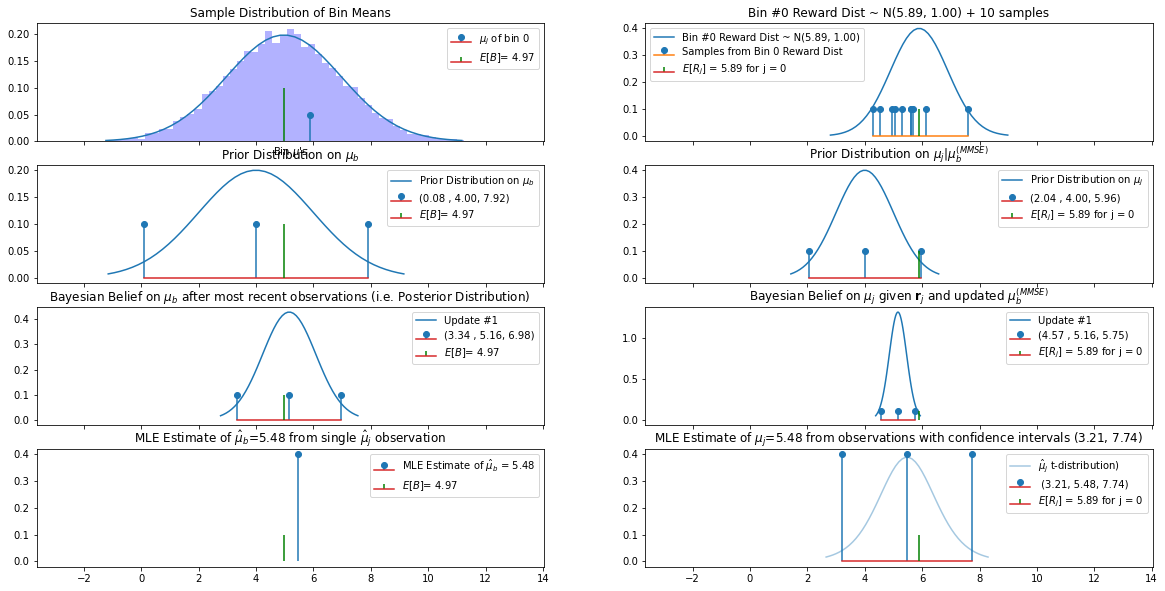

In [15]:

est.simulate(0,10)

Sample Distribution of Expected Bin Rewards : N(4.97,4.03)
Drawing 10 samples from bin # 1
Observations: [5.18860632 4.3975804  4.79467264 5.30083549 4.90210383 5.75539286
 5.06569575 4.42461575 3.36895779 3.4631131 ]
Computing posteriors based on observations
True bin distribution: Bin #1 ~ N(3.920, 1)
Observation: [5.18860632 4.3975804  4.79467264 5.30083549 4.90210383 5.75539286
 5.06569575 4.42461575 3.36895779 3.4631131 ]
Observation mean: 4.666
Observation variance: 0.535
Posterior before update: N(5.157, 0.863)
Bin Posterior before update: P(mu_j|mu_b_mmse = 4) = N([4], 1)
Posterior after the update: N(4.941, 0.484)
Bin Posterior after update: P(mu_j|mu_b_mmse = 4.941333764841328) = N(4.6911734267123215, 0.09090909090909091)


(<Figure size 1440x720 with 8 Axes>,
 {'true_band_dist': <AxesSubplot:label='true_band_dist', title={'center':'Sample Distribution of Bin Means'}, xlabel="Bin $\\mu$'s">,
  'true_rew_dist': <AxesSubplot:label='true_rew_dist', title={'center':'Bin #1 Reward Dist ~ N(3.92, 1.00) + 10 samples'}>,
  'prior_mu_b': <AxesSubplot:label='prior_mu_b', title={'center':'Bayesian Belief on $\\mu_b$ before most recent observations'}>,
  'prior_mu_j': <AxesSubplot:label='prior_mu_j', title={'center':'Prior Distribution on $\\mu_j | \\mu_b^{(MMSE)}$'}>,
  'post_mu_b': <AxesSubplot:label='post_mu_b', title={'center':'Bayesian Belief on $\\mu_b$ after most recent observations (i.e. Posterior Distribution)'}>,
  'post_mu_j': <AxesSubplot:label='post_mu_j', title={'center':'Bayesian Belief on $\\mu_j$ given $\\mathbf{r}_j$ and updated $\\mu_b^{(MMSE)}$'}>,
  'freq_mu_b': <AxesSubplot:label='freq_mu_b', title={'center':'MLE Estimate of $\\hat\\mu_b$=5.07 from single $\\hat\\mu_j$ observation'}>,
  'freq_mu

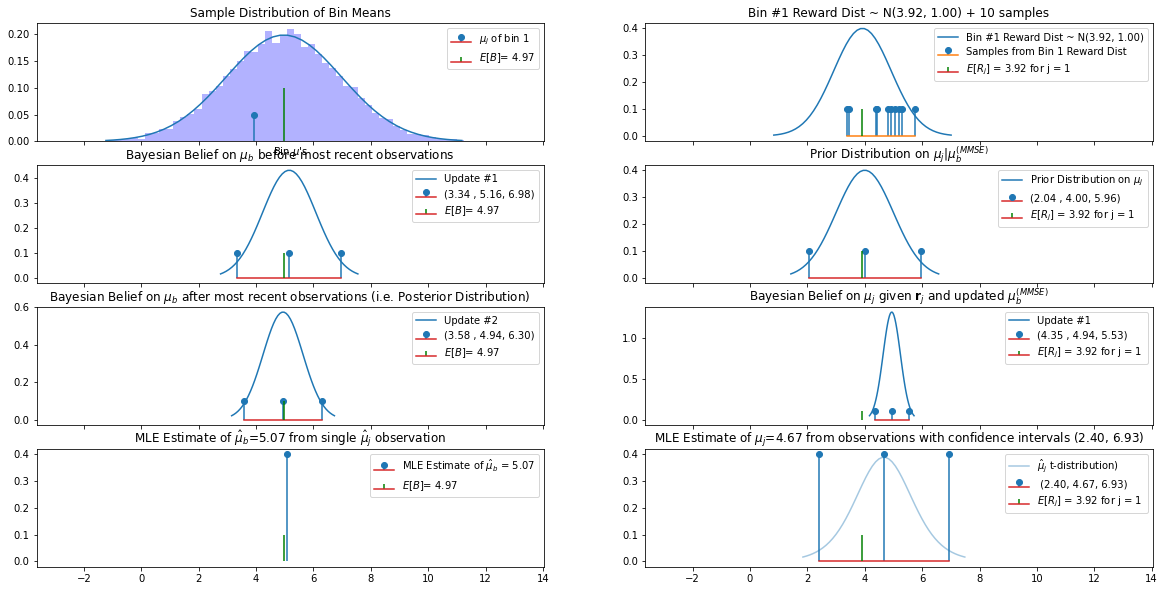

In [16]:
est.simulate(1,10)